# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  40 баллов

<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  60 баллов
* Задача 4 &mdash;  30 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# возможно придется что-то добавить)

## <b><font color="blue">Легкая часть</font></b>

## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте и поясните свой ответ на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

**Ответ:** Перед обучением линейной регрессии нужно удалить выбросы из распределения и пустые значения. Мы можем применять те преобразования, которые не поменяют модель дерева и условие $x_j<t$.

Монотонные функции от одного признака никак не изменят модель дерева, они могут быть полезны в удобном представлении данных в каких-то задачах. Со стандартизацией признаков то же самое.

Применение немонотонных функций от одного признака и нелинейных функций от нескольких признаков может дать новую информацию о дереву и изменить условия для построения(структуру).Например, если нам нужно оценить энергию тела, которая зависит от квадрата  абсолютного значения скорости, тогда условия $v>v_{пороговое}$ и  $v<-v_{пороговое}$ перепишется в виде: $|v|>v_{пороговое}$.Также нелинейные функции нескольких признаков могут упростить задачу.

Применение линейных функций от нескольких признаков может быть эксвивалентно нескольким ветвям и условиям дерева, т.е. не изменит структуру, но может ускорить обучение и работу. (пример:как на параметр легче смотреть на полную эжегодную прибыль человека, нежели на его ежемесячные поступления.

## Задача 2

### 1. Загрузка и предобработка данных.
### *Профиль физика*



Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`.



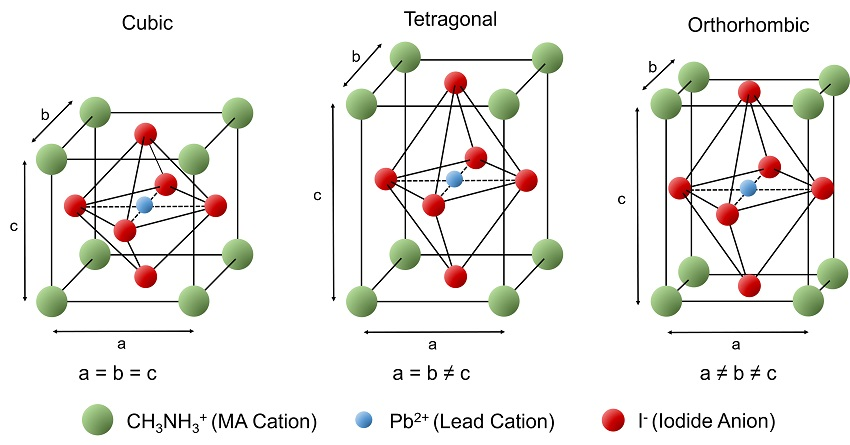


Каждое наблюдение описывается 13 столбцами признаков и 1 столбцом класса, который идентифицирует его как кубическую, тетрагональную, ромбическую или ромбоэдрическую структуру. Наборы признаков - различные параметры кристаллической решетки, такие как валентность, ионный радиус, среднее значение электроотрицательности, постоянная решетки, а так же энергия, которая численно равна работе, которую необходимо затратить, чтобы разделить и отделить друг от друга на бесконечное расстояние частицы.

In [ ]:
data = pd.read_csv("/content/Crystal_structure.csv")

Сделаем предобработку данных.

In [ ]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

NameError: name 'data' is not defined

### *Профиль биология*

В этом [наборе данных](https://www.kaggle.com/datasets/arezaei81/heartcsv) содержится различная информация о пациентах, включая возраст, пол, артериальное давление, уровень холестерина, электрокардиографические характеристики (ЭКГ) и многое другое. Целевой характеристикой является `target` - наличие у пациента сердечного заболевания.



Информация о наборе данных:

1. **age**: Возраст пациента.
2. **sex**: Пол пациента (0: женский, 1: мужской).
3. **cp**: Тип боли в груди.
4. **trestbps**: Артериальное давление в состоянии покоя.
5. **chol**: уровень холестерина в сыворотке крови.
6. **fbs**: Быстрый сахар крови > 120 мг/дл.
7. **restecg**: Результаты электрокардиографии в состоянии покоя.
8. **thalach**: Максимальная достигнутая частота сердечных сокращений.
9. **exang**: Стенокардия, вызванная физической нагрузкой.
10. **oldpeak**: Депрессия ST, вызванная физической нагрузкой по сравнению с покоем.



In [ ]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [ ]:
X = heart.drop('target', axis=1)
y = heart['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


Обучите модель решающего дерева.

In [ ]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Сделайте предсказание для тестовой выборки.

In [ ]:
y_pred=clf.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [ ]:

A=np.array(y_pred==y_test, dtype='int' )
A

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1])

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [ ]:
alpha=0.95
z=sps.norm.ppf((1+alpha)/2)
theta=np.mean(A)
sigma=np.sqrt(theta*(1-theta))
n=len(A)
left=theta-(z*sigma)/np.sqrt(n)
right=theta+(z*sigma)/np.sqrt(n)
print(f'ДИ: {(np.round(left, 3), np.round(right,3))}')

ДИ: (0.646, 0.827)


Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [ ]:
forest=RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2=forest.predict(X_test)
B=np.array(y_pred2==y_test, dtype='int')
B

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1])

In [ ]:
alpha=0.95
z2=sps.norm.ppf((1+alpha)/2)
theta2=np.mean(B)
sigma2=np.sqrt(theta2*(1-theta2))
n2=len(B)
left2=theta2-(z2*sigma2)/np.sqrt(n2)
right2=theta2+(z2*sigma2)/np.sqrt(n2)
print(f'ДИ:{(np.round(left2,3), np.round(right2, 3))}')

ДИ:(0.746, 0.902)


**Выводы:** из полученных доверительных интервалов можно сделать вывод, что использование случайного леса вместо одного решающего дерева повышает качество предсказаний.

## <b><font color="orange">Сложная часть</font></b>
## Задача 3
### 1. Загрузка данных
### *Профиль физика*

Рассмотрим <a href='https://archive.ics.uci.edu/dataset/291/airfoil+self+noise' target="_blank">набор данных НАСА</a>, он включает в себя аэродинамические профили NACA-0012 разных размеров при различных параметрах в аэродинамической трубе и углах атаки. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. Целевой переменной будет scaled-sound-pressure: это звуковое давление в определенной части лопасти, распределение этой величины показано на втором рисунке. Данная задача конечно имеет почти аналитическое решение, однако оно занимает довольно много времени и ресурсов. Мы хотим продемострировать возможность использования лесов для быстрых и довольно точных численных оценок.



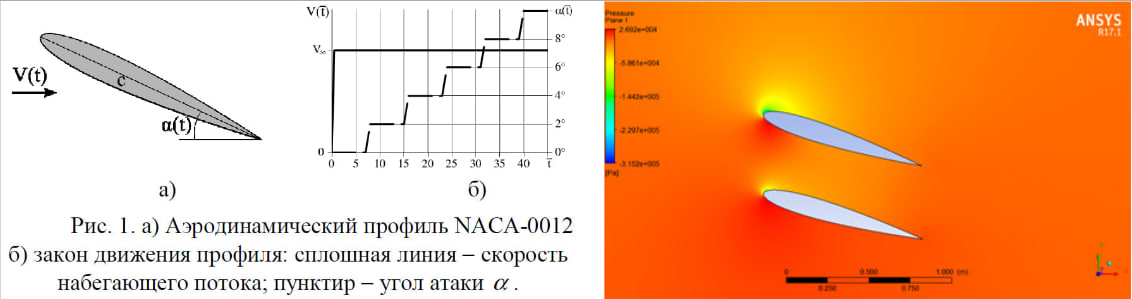

In [ ]:
column_names = ['frequency', 'attack-angle', 'chord-length', 'free-stream-velocity', "suction-side-displacement-thickness", "scaled-sound-pressure"]
df = pd.read_csv("/content/airfoil_self_noise.dat", sep='\t', names=column_names)

FileNotFoundError: [Errno 2] No such file or directory: '/content/airfoil_self_noise.dat'

In [ ]:
df = df.rename(columns={'scaled-sound-pressure': 'target'})
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
X = df.drop('target',axis=1)
y = df[['target']]

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

### *Профиль биология*

[Данные](https://archive.ics.uci.edu/dataset/1/abalone). Будем предсказывать возраст моллюсков.

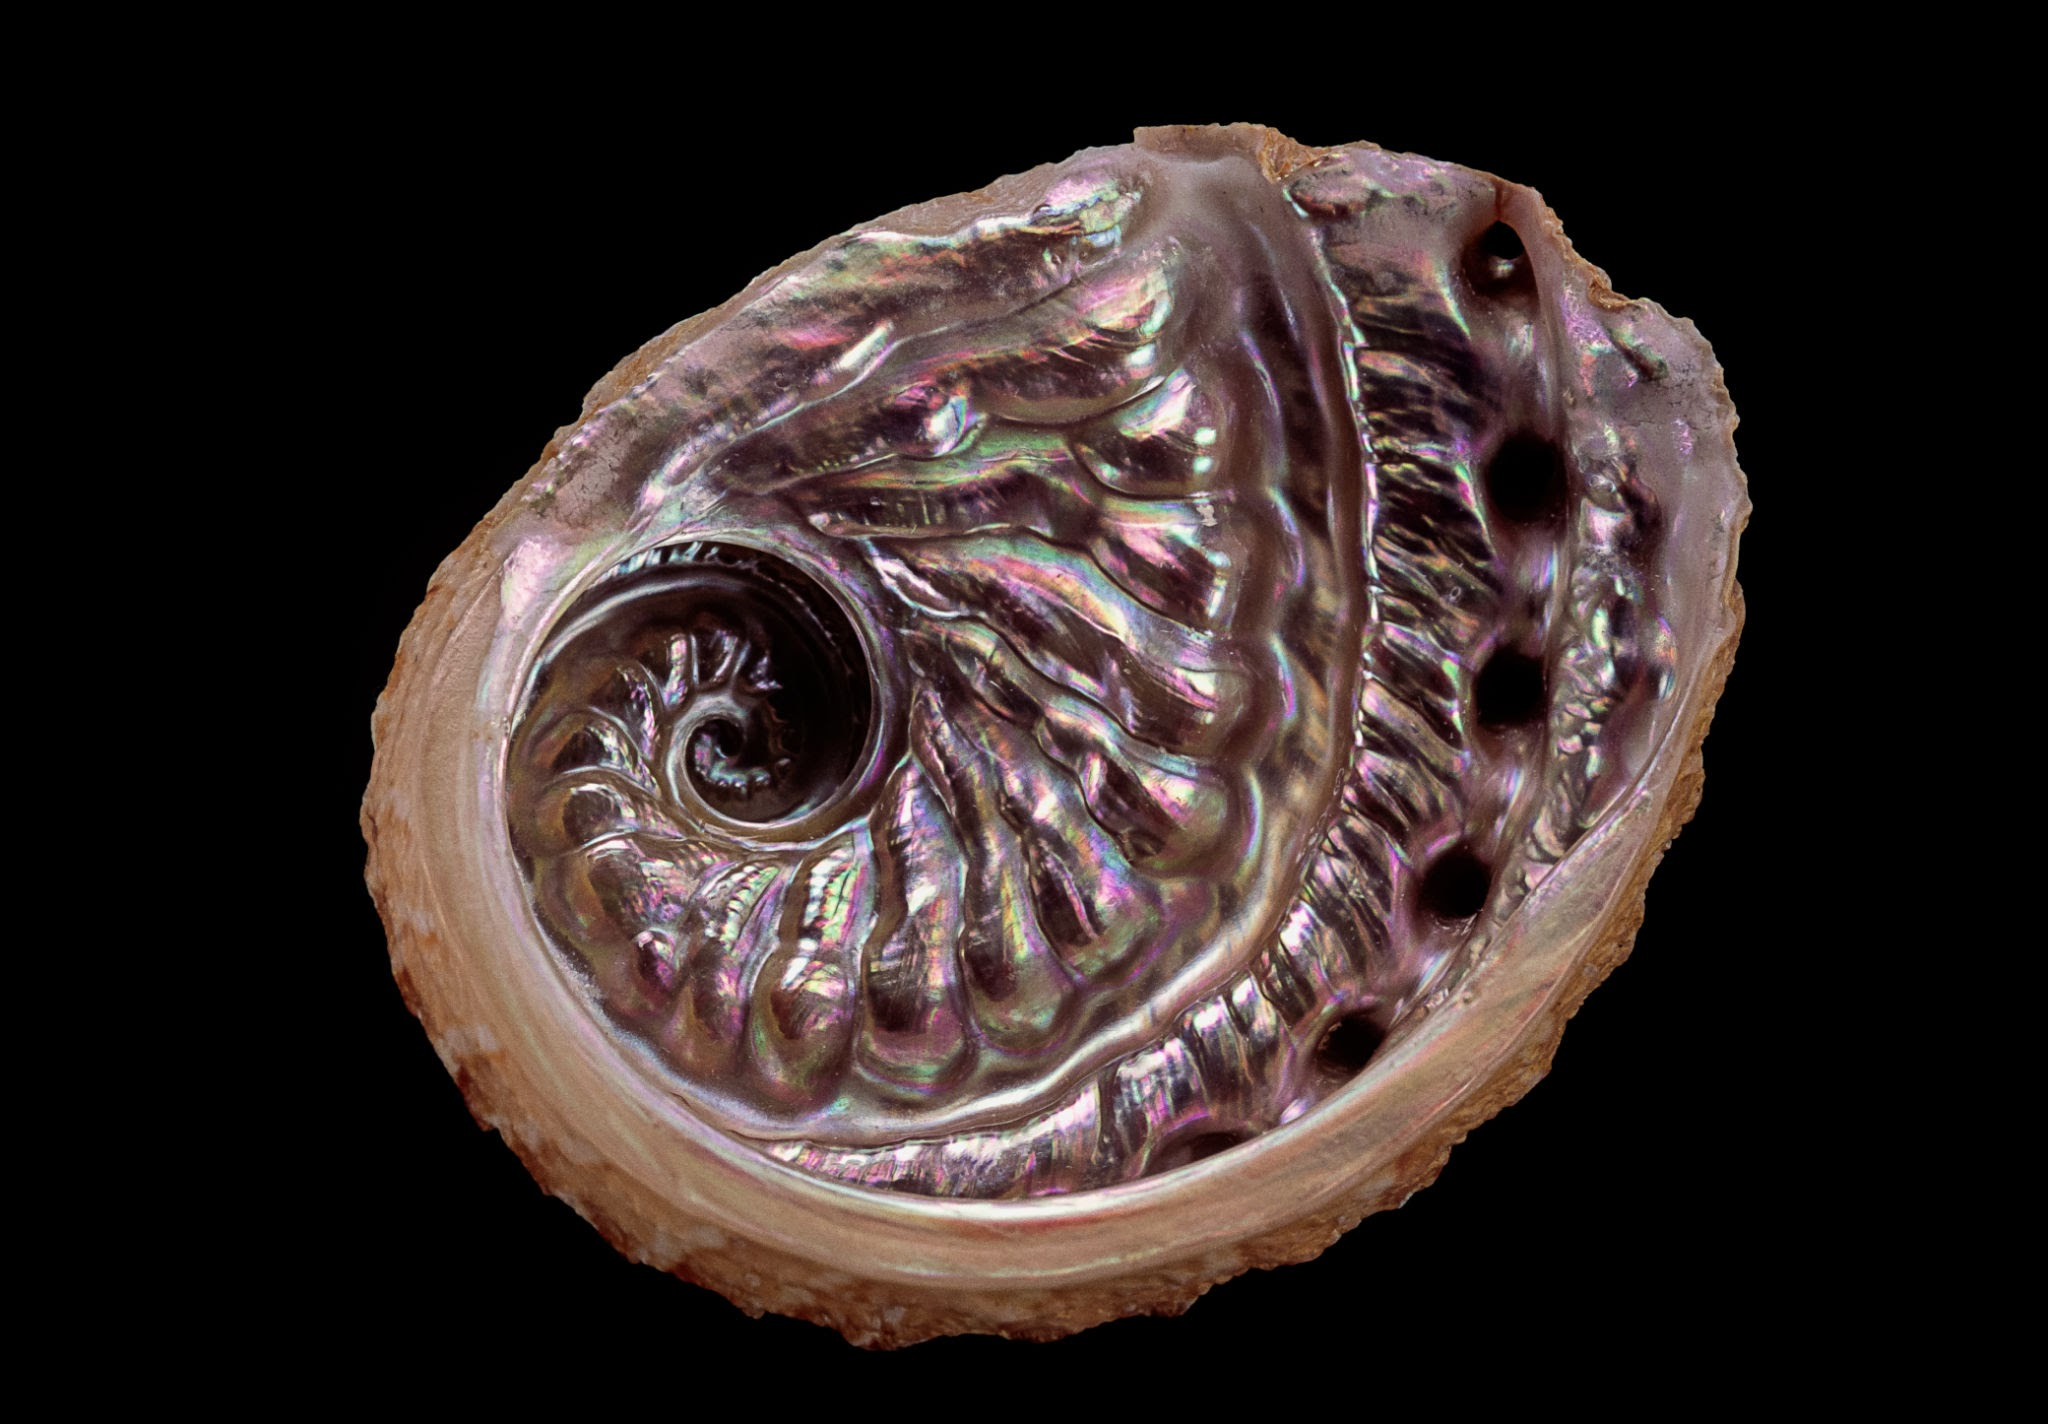

In [3]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                                          'Shucked weight', 'Viscera weight', 'Shell weight',
                                          'Rings'])

In [4]:
data = data.drop('Sex', axis=1)
X = data.drop('Rings', axis=1)
y = data['Rings'] + 1.5

In [5]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_1, y_1, test_size = 0.2, random_state=42)

### 2. Обучение модели

Обучите решающее дерево глубины 3 и визуализируйте его.

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

In [6]:
tree=DecisionTreeRegressor(random_state=42, max_depth=3)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

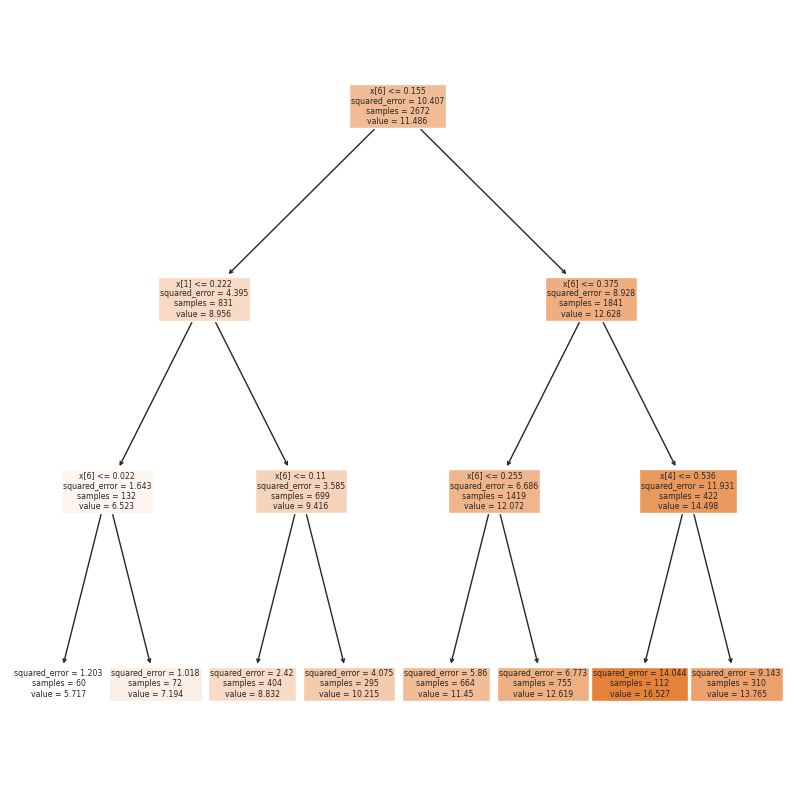

In [9]:
plt.figure(figsize=(10,10))
plot_tree(tree, filled=True)
plt.show()

Посчитайте выбранную метрику на валидационной выборке.

In [11]:
y_pred=tree.predict(X_valid)
print('MAPE:', mean_absolute_percentage_error(y_valid, y_pred)) #accuracy не сичтался

MAPE: 0.1552637500014212


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график - зависиость ошибки от максимальной глубины дерева. Подробнее про гиперпараметры смотрите в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

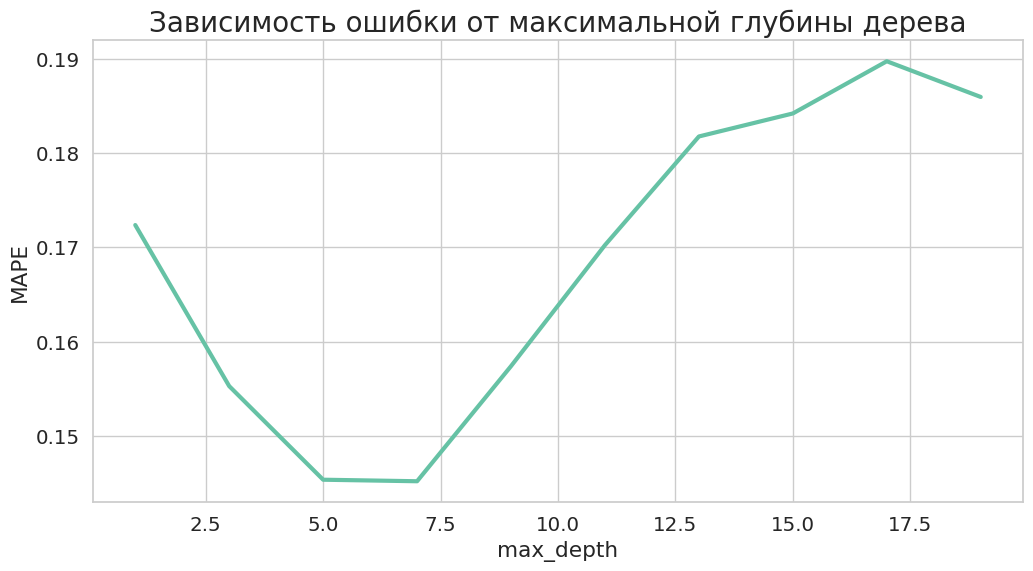

In [ ]:
MAPE=[]
depth=np.arange(1,20,2)
for param in depth:
  tree=DecisionTreeRegressor(random_state=42, max_depth=param)
  tree.fit(X_train, y_train)
  MAPE.append(mean_absolute_percentage_error(y_valid, tree.predict(X_valid)))

plt.figure(figsize=(12,6))
plt.plot(depth, MAPE, lw=3)
plt.xlabel('max_depth')
plt.ylabel('MAPE')
plt.title('Зависимость ошибки от максимальной глубины дерева', fontsize=20)
plt.show()

По графику можно определить, что оптимальное значение оптимальной глубины дерева max_depth=6.

Аналогичным образом подберите минимальное число объектов, необходимое для того, чтобы узел дерева мог бы расщепиться, зафиксировав при этом подобранное значение максимальной глубины. Для минимального числа объектов в листе и максимального число признаков, по которым ищется лучшее разбиение в дереве, подберите аналогично, фиксируя лучшие значения гиперпараметров, подобранные на предыдущем шаге.

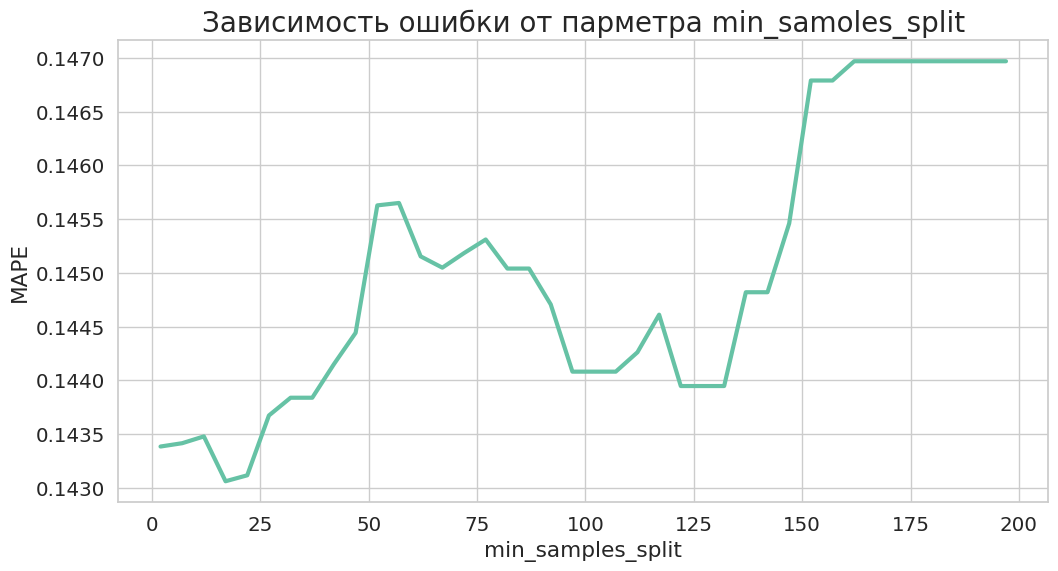

In [ ]:
split=np.arange(2,200,5)
MAPE=[]
for param in split:
  tree=DecisionTreeRegressor(max_depth=6, min_samples_split=param, random_state=42)
  tree.fit(X_train, y_train)
  MAPE.append(mean_absolute_percentage_error(y_valid, tree.predict(X_valid)))

plt.figure(figsize=(12,6))
plt.plot(split, MAPE, lw=3)
plt.xlabel('min_samples_split')
plt.ylabel('MAPE')
plt.title('Зависимость ошибки от парметра min_samoles_split', fontsize=20)
plt.show()

По графику видно, что оптимальное значение минимального числа объектов,необходимых для разделения внутреннего узла min_samples_split=20

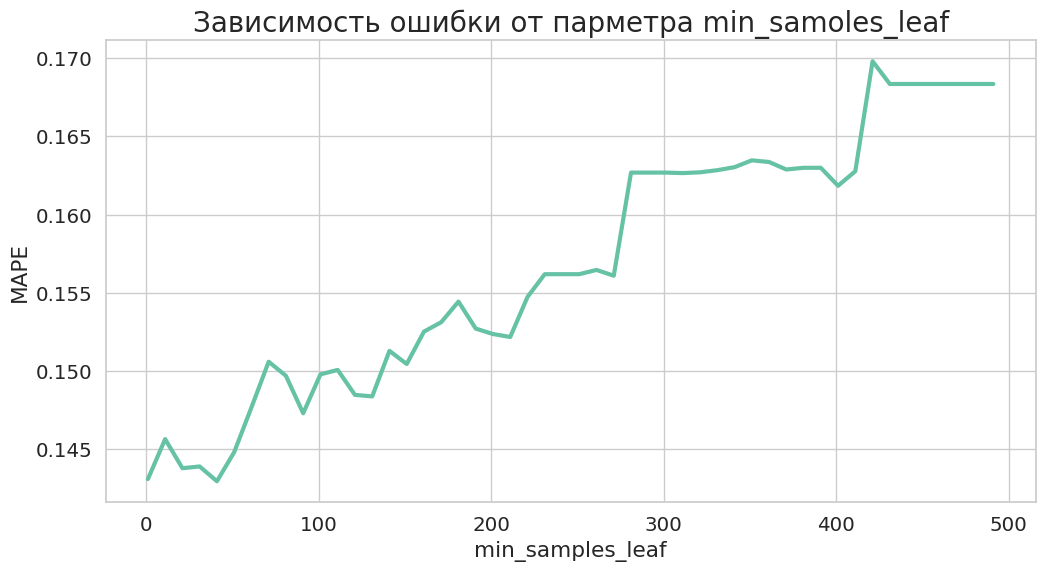

In [ ]:
leafs=np.arange(1,500,10)
MAPE=[]
for param in leafs:
  tree=DecisionTreeRegressor(max_depth=6, min_samples_split=20, min_samples_leaf=param, random_state=42)
  tree.fit(X_train, y_train)
  MAPE.append(mean_absolute_percentage_error(y_valid, tree.predict(X_valid)))

plt.figure(figsize=(12,6))
plt.plot(leafs, MAPE, lw=3)
plt.xlabel('min_samples_leaf')
plt.ylabel('MAPE')
plt.title('Зависимость ошибки от парметра min_samoles_leaf', fontsize=20)
plt.show()

Оптимальное значение значение минимального числа объектов в листе min_samples_leaf=50

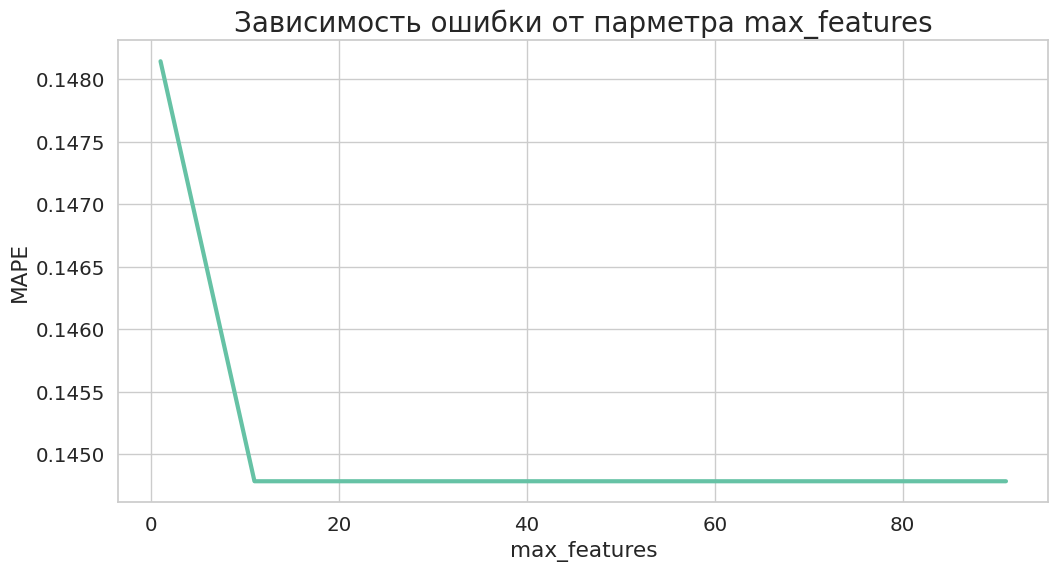

In [ ]:
features=np.arange(1,100,10)

MAPE=[]
for param in features:
  tree=DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=20, min_samples_leaf=50, max_features=param)
  tree.fit(X_train,y_train)
  MAPE.append(mean_absolute_percentage_error(y_valid,tree.predict(X_valid)))

plt.figure(figsize=(12,6))
plt.plot(features, MAPE, lw=3)
plt.xlabel('max_features')
plt.ylabel('MAPE')
plt.title('Зависимость ошибки от парметра max_features', fontsize=20)
plt.show()

Оптимальное значение максимального количества признаков max_features=20.

Обучите вашу лучшую модель и сделайте предсказание для тестовой выборки.

In [ ]:
tree_perfect=DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=20, min_samples_leaf=50, max_features=20)
tree_perfect.fit(X_train, y_train)
prediction=tree_perfect.predict(X_test)

Теперь вам предлагается проверить результат своей реализации с уже существующей функцией для оптимизации гиперпараметров - `GridSearchCV`. Эта функция помогает перебирать предопределенные гиперпараметры и подгонять вашу модель к тренировочному набору. Сравните полученные гиперпараметры и если они различаются, объясните почему. Для этого вам может понадобится [документация](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
grid_space={'max_depth': [3,6],
            'min_samples_split': [2,20,25],
            'min_samples_leaf': np.arange(1,50),
            'max_features': np.arange(1,20)

}
tree=DecisionTreeRegressor(random_state=42)
grid=GridSearchCV(tree, param_grid=grid_space, cv=3, scoring='accuracy')
model_grid=grid.fit(X_train, y_train)
print(model_grid.best_params_)

Выходные данные были обрезаны до нескольких последних строк (5000).

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", lin

{'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


Посчитатайте метрику на тестовой выборке и взуализируйте деревья при оптимальных гиперпараметрахдля двух оптимальных моделей - вашей и GridSearchCV.

**Ваша модель**

In [12]:
tree_my=DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=20, min_samples_leaf=50, max_features=20)
tree_my.fit(X_train, y_train)
y_pred_1=tree_my.predict(X_test)
print(mean_absolute_percentage_error(y_pred_1, y_test))

0.14528848207207534


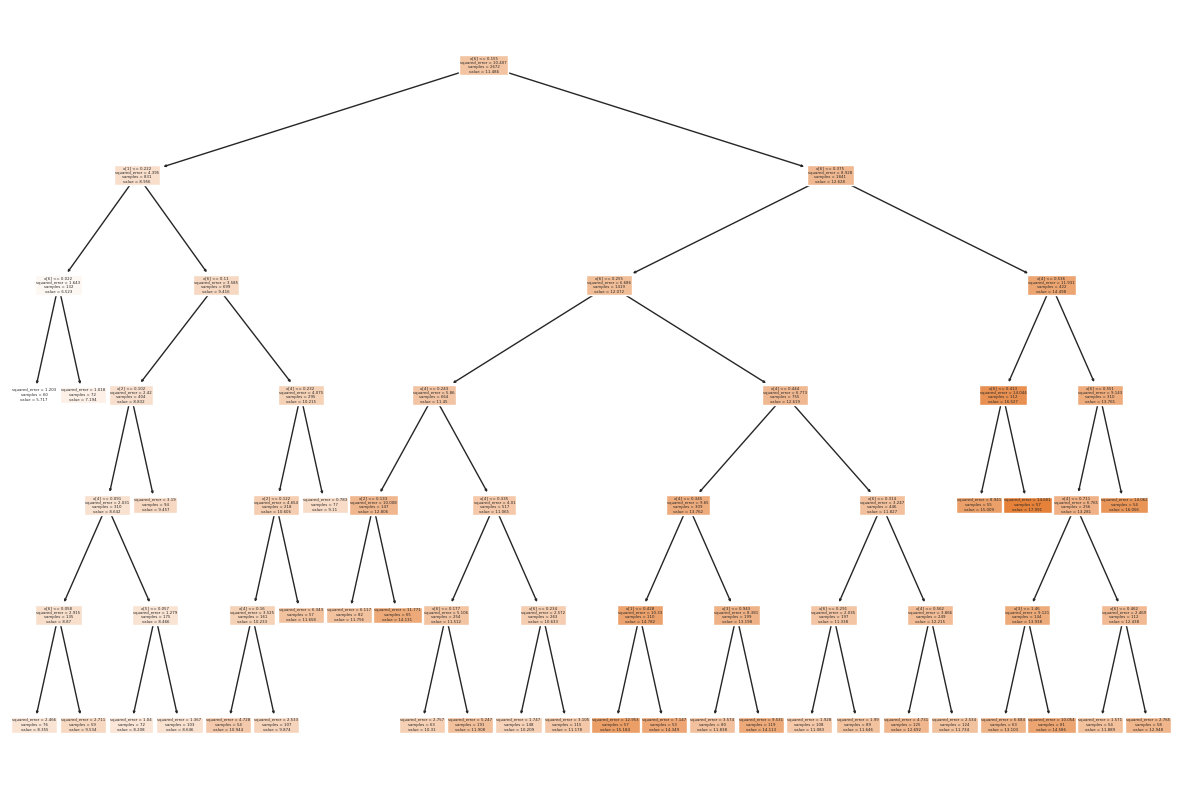

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(tree_my, filled=True)
plt.show()

**Лучшая модель по мнению GridSearchCV**

In [13]:
tree_grid=DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_split=2, min_samples_leaf=1, max_features=1)
tree_grid.fit(X_train, y_train)
y_pred_2=tree_grid.predict(X_test)
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_2))

MAPE: 0.16605082771529758


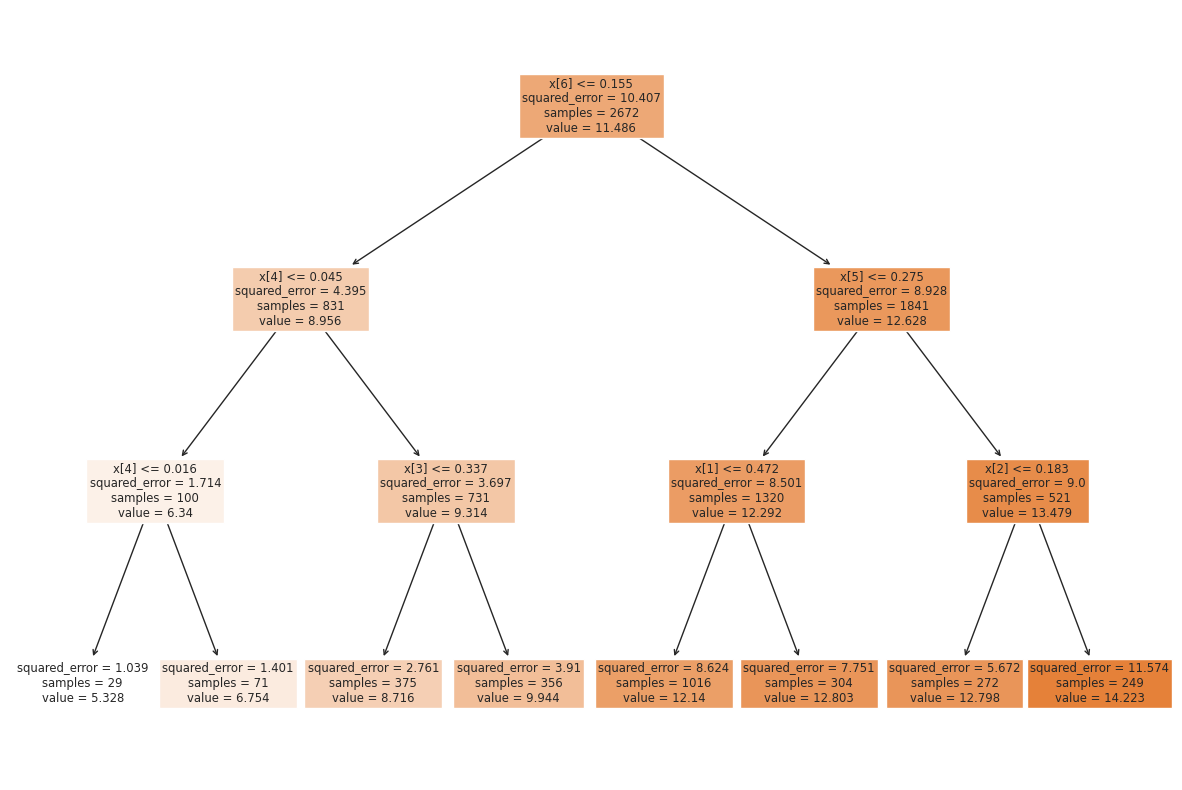

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(tree_grid, filled=True)
plt.show()

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа,
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их на одном графике с помощью `seaborn.barplot` для обеих моделей.

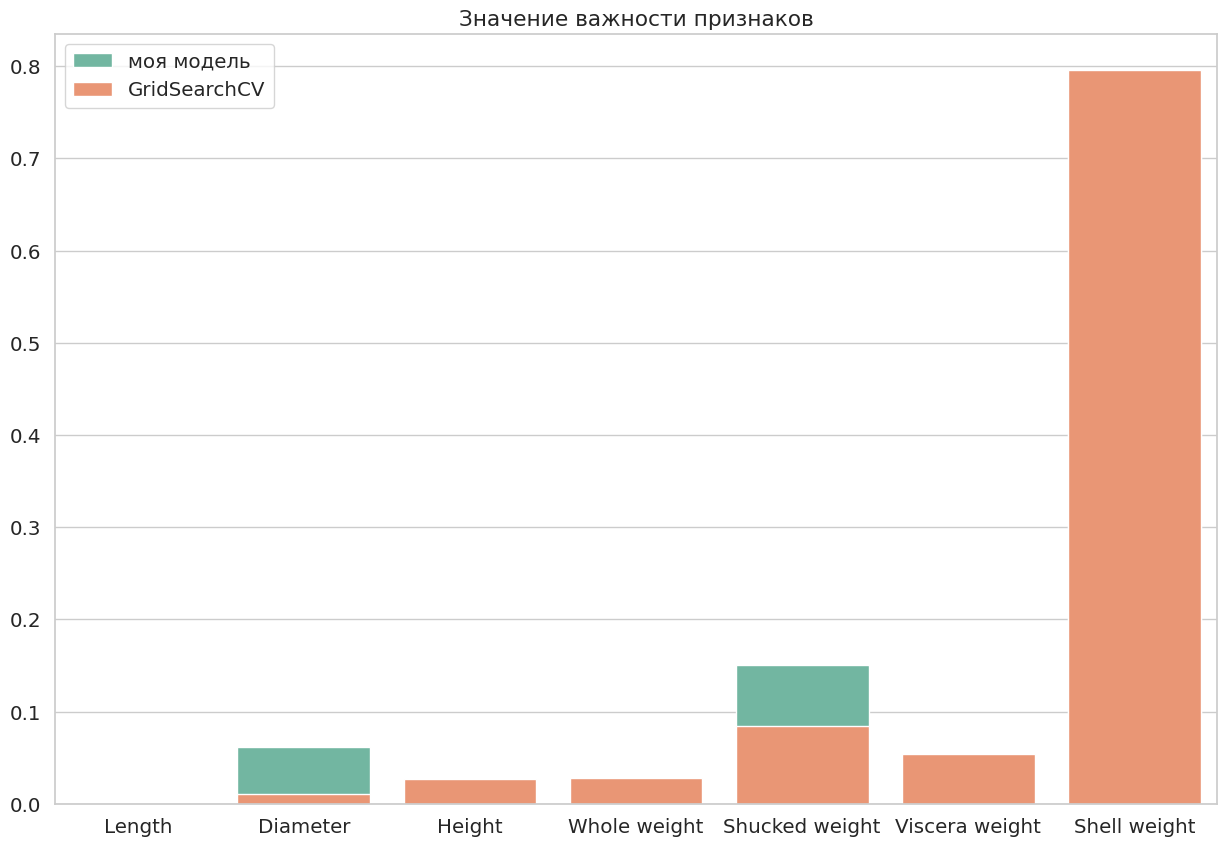

In [ ]:
importance_1=tree_my.feature_importances_
importance_2=tree_grid.feature_importances_

plt.figure(figsize=(15,10))
sns.barplot(x=list(X_train), y=importance_1, label='моя модель')
sns.barplot(x=list(X_train), y=importance_2, label='GridSearchCV')
plt.title('Значение важности признаков')

plt.show()

Сделайте выводы. Объясните, согласуется ли логически, почему вес того или иного параметра так влияет на целевую переменную.

**Вывод:**из диаграммы видно, что самую большую важность имеет параметр shell_weight, все остальные имеют вес не больше 0.1. Это может быть связано с тем, что этот признак чаще всего использовался при разбиении листа, качественно это означает что это признак в больщей степени хаарктеризует возраст моллюсков.

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [6]:
forest=RandomForestRegressor(n_estimators=500)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

Посчитайте метрику на тестовой выборке.

In [ ]:
tree_in_forest=forest.estimators_

mape_train=[]
pred_train=np.array([tree_in_forest[i].predict(X_train) for i in range(500)]).reshape(-1,500)
train=np.cumsum(pred_train, axis=1)/(np.arange(500)+1)
for i in range(500):
  mape_train.append(mean_absolute_percentage_error(y_train, train.T[i]))

In [ ]:
mape_valid=[]
pred_valid=np.array([tree_in_forest[i].predict(X_valid) for i in range(500)]).reshape(-1,500)
valid=np.cumsum(pred_valid, axis=1)/(np.arange(500)+1)
for i in range(500):
  mape_valid.append(mean_absolute_percentage_error(y_valid,valid.T[i]))


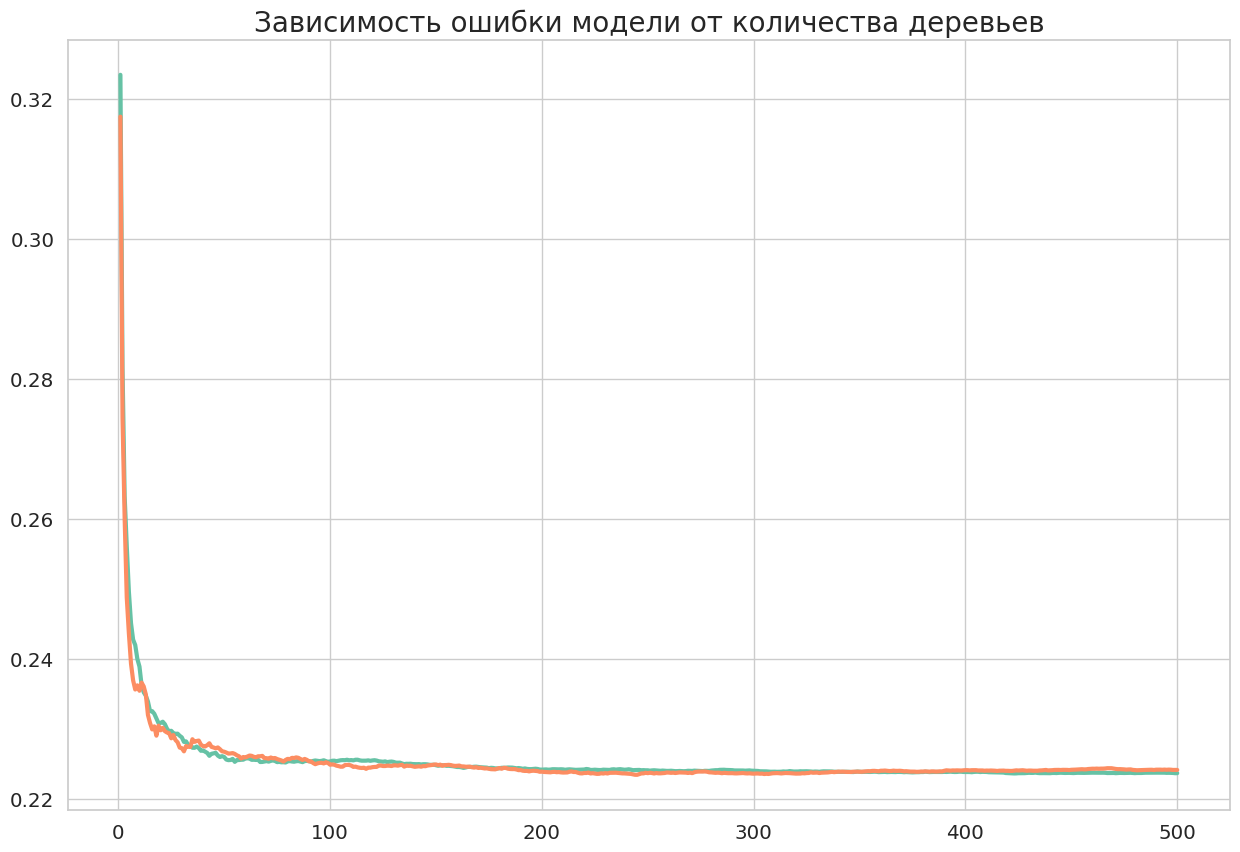

In [21]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(500)+1, mape_train,lw=3,  label='Тренировочная выборка')
plt.plot(np.arange(500)+1, mape_valid, lw=3, label='Валидационная выборка')
plt.title('Зависимость ошибки модели от количества деревьев', fontsize=20)
plt.show()

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`.

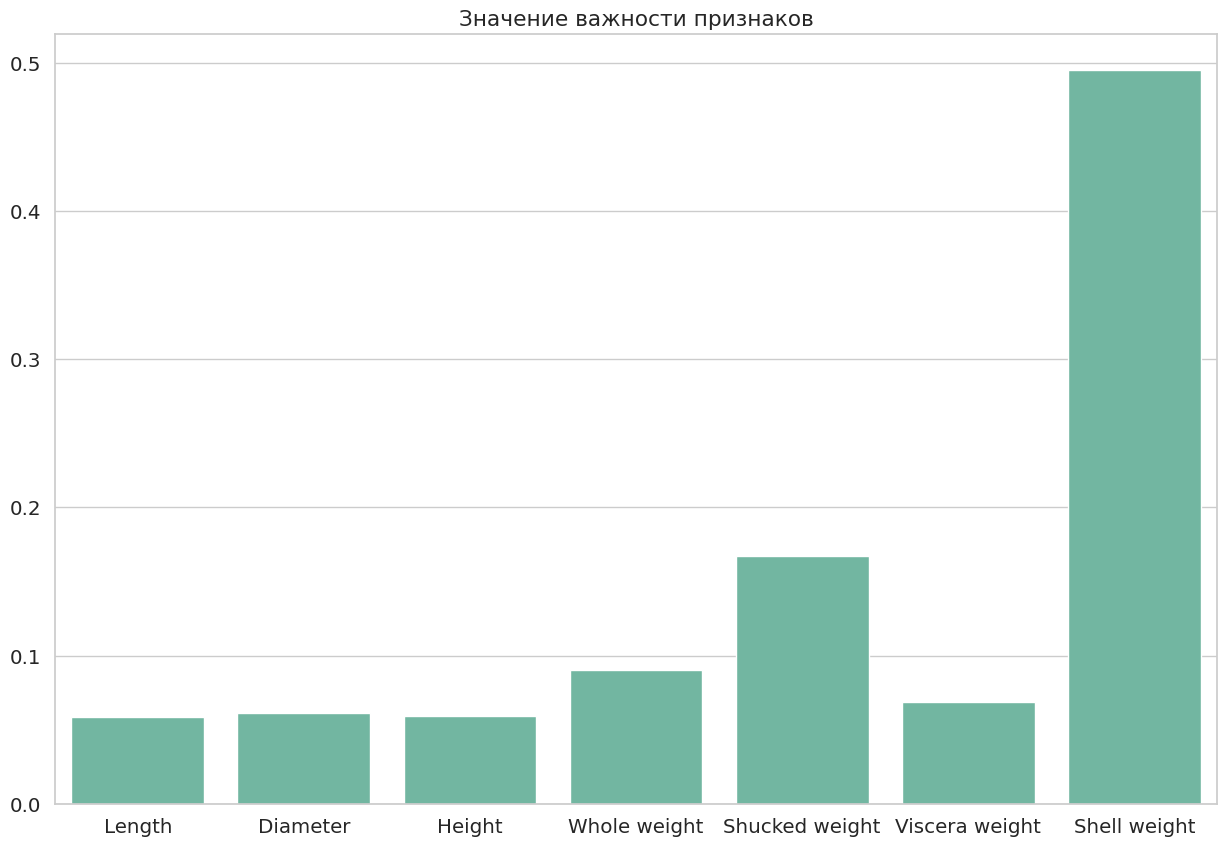

In [22]:
importance=forest.feature_importances_
plt.figure(figsize=(15,10))
sns.barplot(x=list(X_train), y=importance)
plt.title('Значение важности признаков')

plt.show()


Сделайте выводы.

**Вывод:** из графика зависимости ошибки модели от количества деревьев видно, что с числом числа деревьев уменьшается значение ошибки, причем графики для валидационной и тренировоной выборок практически совпадают. Из визуализации значения признаков можно увидеть, что важность признаков больше , чем для модели одного дерева, что означает, что модель случайного леса точнее, чем модель решающего дерева.